# 日経平均株価 日足

In [1]:
import sys
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

try:
    __file__
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    from pathlib import Path
    Path().resolve()
    sys.path.append(os.path.join(Path().resolve(), '..'))

from funcs.technical import psar

In [2]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-05 00:00:00+09:00,36536.250000,37099.960938,36359.230469,36657.089844,111300000,0.0,0.0
2024-09-06 00:00:00+09:00,36815.000000,36898.281250,36235.609375,36391.468750,111700000,0.0,0.0
2024-09-09 00:00:00+09:00,35805.820312,36248.121094,35247.871094,36215.750000,118200000,0.0,0.0
2024-09-10 00:00:00+09:00,36386.121094,36537.031250,36001.578125,36159.160156,112300000,0.0,0.0
2024-09-11 00:00:00+09:00,36029.898438,36056.871094,35253.429688,35619.769531,127600000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-26 00:00:00+09:00,38143.679688,38175.238281,37742.761719,38142.371094,120800000,0.0,0.0
2025-02-27 00:00:00+09:00,38251.109375,38369.960938,38061.941406,38256.171875,121600000,0.0,0.0
2025-02-28 00:00:00+09:00,37853.480469,37925.281250,36840.121094,37155.500000,191600000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-05 00:00:00+09:00,21399.869141,21399.869141,21220.759766,21329.119141,85700000,0.0,0.0
2020-03-06 00:00:00+09:00,21009.800781,21061.199219,20613.910156,20749.750000,111700000,0.0,0.0
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,19472.259766,19698.759766,170300000,0.0,0.0
2020-03-10 00:00:00+09:00,19474.890625,19970.349609,18891.769531,19867.119141,164700000,0.0,0.0
2020-03-11 00:00:00+09:00,19758.259766,19974.830078,19392.250000,19416.060547,129200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-26 00:00:00+09:00,38143.679688,38175.238281,37742.761719,38142.371094,120800000,0.0,0.0
2025-02-27 00:00:00+09:00,38251.109375,38369.960938,38061.941406,38256.171875,121600000,0.0,0.0
2025-02-28 00:00:00+09:00,37853.480469,37925.281250,36840.121094,37155.500000,191600000,0.0,0.0


## 日足チャートと Parabolic SAR

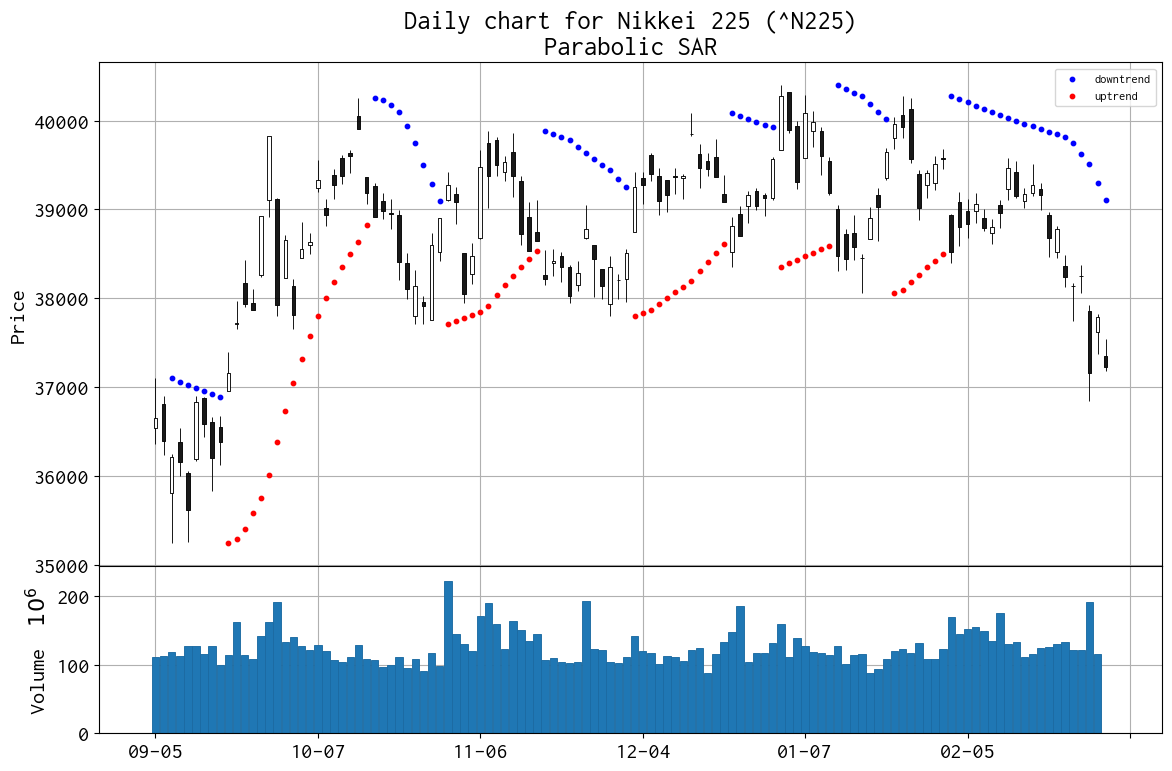

In [4]:
dict_psar = psar(df)

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

ma5 = df0['Close'].rolling(5).median()
ma25 = df0['Close'].rolling(25).median()
ma75 = df0['Close'].rolling(75).median()
ma200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=10,
        color='blue',
        label='downtrend',
        ax=ax[0]
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=10,
        color='red',
        label='uptrend',
        ax=ax[0]
    ),
    #mpf.make_addplot(ma5[df.index], width=1, label='  5 days', ax=ax[0]),
    #mpf.make_addplot(ma25[df.index], width=1, label=' 25 days', ax=ax[0]),
    #mpf.make_addplot(ma75[df.index], width=1, linestyle='dashed', label=' 75 days', ax=ax[0]),
    #mpf.make_addplot(ma200[df.index], width=1, linestyle='dotted', label='200 days', ax=ax[0]),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
try:
    ax[0].set_title('Daily chart for %s (%s)\nParabolic SAR' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nParabolic SAR' % symbol)

#ax.grid()
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_%s.png' % code)
plt.show()

In [19]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-04 00:00:00+09:00,37532.011719,37587.488281,36816.160156,37064.410156,0,0.0,0.0


In [20]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00+09:00    37785.468750
2025-03-04 00:00:00+09:00    37064.410156
Name: Close, dtype: float64

In [21]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00+09:00           NaN
2025-03-04 00:00:00+09:00   -721.058594
Name: Close, dtype: float64

In [22]:
df['Close'].rolling(25).mean()

Date
2024-09-04 00:00:00+09:00             NaN
2024-09-05 00:00:00+09:00             NaN
2024-09-06 00:00:00+09:00             NaN
2024-09-09 00:00:00+09:00             NaN
2024-09-10 00:00:00+09:00             NaN
                                 ...     
2025-02-26 00:00:00+09:00    39098.906094
2025-02-27 00:00:00+09:00    39068.033750
2025-02-28 00:00:00+09:00    38968.403750
2025-03-03 00:00:00+09:00    38881.467656
2025-03-04 00:00:00+09:00    38766.764844
Name: Close, Length: 119, dtype: float64

In [23]:
df['Close'].rolling(100).mean()

Date
2024-09-04 00:00:00+09:00             NaN
2024-09-05 00:00:00+09:00             NaN
2024-09-06 00:00:00+09:00             NaN
2024-09-09 00:00:00+09:00             NaN
2024-09-10 00:00:00+09:00             NaN
                                 ...     
2025-02-26 00:00:00+09:00    38989.469336
2025-02-27 00:00:00+09:00    38973.735469
2025-02-28 00:00:00+09:00    38966.094961
2025-03-03 00:00:00+09:00    38957.429961
2025-03-04 00:00:00+09:00    38949.986445
Name: Close, Length: 119, dtype: float64